# Conover Notes on Data Set:
### Link https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset

### Features:
#### address: String. Bitcoin address.

#### year: Integer. Year.

#### day: Integer. Day of the year. 1 is the first day, 365 is the last day.

#### length: Integer. Length is designed to quantify mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin.

#### weight: Float. Weight quantifies the merge behavior (i.e., the transaction has more input addresses than output addresses), where coins in multiple addresses are each passed through a succession of merging transactions and accumulated in a final address

#### count: Integer.  the count feature is designed to quantify the merging pattern. However, the count feature represents information on the number of transactions, whereas the weight feature represents information on the amount of transactions

#### looped: Integer. - Loop is intended to count how many transaction i) split their coins; ii) move these coins in the network by using different paths and finally, and iii) merge them in a single address.

#### neighbors: Integer.

#### income: Integer. Satoshi amount (1 bitcoin = 100 million satoshis). Note, Satoshi is an actual BitCoin curancy amount

#### label: Category String. Name of the ransomware family (e.g., Cryptxxx, cryptolocker etc) or white (i.e., not known to be ransomware). 


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import TruncatedSVD
#from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [4]:
bitcoin_df = pd.read_csv('BitcoinHeistData.csv')
bitcoin_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [7]:
### Basic data comparison
x_for_white = bitcoin_df[(bitcoin_df['looped'] > 0) & (bitcoin_df['label'] == 'white')]
print(len(x_for_white))

all_loops = bitcoin_df[bitcoin_df['looped'] > 0]
print(len(all_loops))

print("Transations with loops that are non-'white':", len(all_loops)-len(x_for_white))

407349
411820
Transations with loops that are non-'white': 4471


In [12]:
### Extract the unique labels
uni_labels = bitcoin_df['label'].unique()
print(len(uni_labels))
print(uni_labels)

29
['princetonCerber' 'princetonLocky' 'montrealCryptoLocker'
 'montrealCryptXXX' 'paduaCryptoWall' 'montrealWannaCry'
 'montrealDMALockerv3' 'montrealCryptoTorLocker2015' 'montrealSamSam'
 'montrealFlyper' 'montrealNoobCrypt' 'montrealDMALocker' 'montrealGlobe'
 'montrealEDA2' 'paduaKeRanger' 'montrealVenusLocker' 'montrealXTPLocker'
 'paduaJigsaw' 'montrealGlobev3' 'montrealJigSaw' 'montrealXLockerv5.0'
 'montrealXLocker' 'montrealRazy' 'montrealCryptConsole'
 'montrealGlobeImposter' 'montrealSam' 'montrealComradeCircle'
 'montrealAPT' 'white']


In [14]:
### Split to test and train
train, test = train_test_split(
    bitcoin_df, test_size=0.2, random_state=42)

print(train.shape)
print(test.shape)

(2333357, 10)
(583340, 10)


In [16]:
# For speed, using test first. Removing columns containing data not likely scale well
test_cut = test.drop(columns=['address', 'label', 'year', 'day'])
print(test_cut.shape)
print(test_cut.head())

(583340, 6)
         length    weight  count  looped  neighbors       income
2667698       8  1.311111      3       0          2  577264100.0
2013400       2  0.025000     44       0          1  100000000.0
2704440     144  3.619217   5991    5991          2  299950000.0
1650833     144  0.000484   3452    3049          2  299000000.0
1586811     128  0.625000      2       0          2   40000000.0


In [25]:
###Block to transpose the data... not currently being used
#test_transposed = test_cut.T
#print(test_transposed.shape)
#test_transposed.head()

(6, 583340)


In [22]:
### Normalize by l2
scale = Normalizer(norm='l2')
test_scaled = scale.transform(test_cut)

In [29]:
#Validate that the PCA function call would work with the dataset
pca = PCA(n_components=5)
pca_test = pd.DataFrame(pca.fit_transform(test_scaled))
pca_test.shape

(583340, 5)

In [72]:
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(test_scaled)

NearestNeighbors(n_neighbors=20)

In [73]:
knn = neigh.kneighbors_graph(test_scaled)

In [75]:
print(knn[0].shape)
print(knn[0])
print(knn.shape)
mtrx_dict = knn.todok()
xy = np.array(list(mtrx_dict.keys()))
vals = np.array(list(mtrx_dict.values()))

(1, 583340)
  (0, 0)	1.0
  (0, 118963)	1.0
  (0, 20940)	1.0
  (0, 497338)	1.0
  (0, 379297)	1.0
  (0, 191070)	1.0
  (0, 266492)	1.0
  (0, 303772)	1.0
  (0, 28783)	1.0
  (0, 563316)	1.0
  (0, 234136)	1.0
  (0, 287945)	1.0
  (0, 535261)	1.0
  (0, 555303)	1.0
  (0, 520060)	1.0
  (0, 250137)	1.0
  (0, 322340)	1.0
  (0, 143217)	1.0
  (0, 278936)	1.0
  (0, 357306)	1.0
(583340, 583340)


#### Failed KNN plot below; very time intensive 

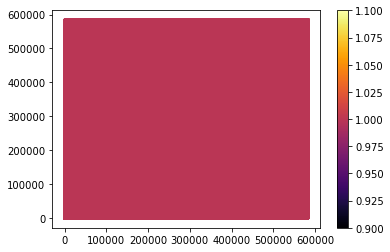

In [76]:
plt.scatter(xy[:,0],xy[:,1], s=5, c=vals, cmap='inferno')
plt.colorbar()
plt.draw()